In [1]:
import sys
sys.path.insert(0, "../../../pymc")

import numpy as np
import pymc as pm
from IPython.display import display
from pymc.model_graph import ModelGraph

from aesara.graph.basic import *

%matplotlib inline

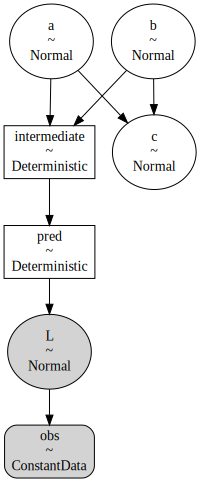

In [2]:
with pm.Model() as pmodel2:
    a = pm.Normal("a")
    b = pm.Normal("b")
    c = pm.Normal("c", a * b)
    intermediate = pm.Deterministic("intermediate", a + b)
    pred = pm.Deterministic("pred", intermediate * 3)

    obs = pm.ConstantData("obs", 1.75)

    L = pm.Normal("L", mu=1 + 0.5 * pred, observed=obs)

display(pm.model_to_graphviz(pmodel2))

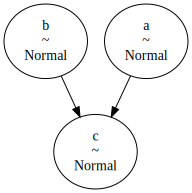

In [3]:
display(pm.model_to_graphviz(pmodel2, selected_vars=["c"]))

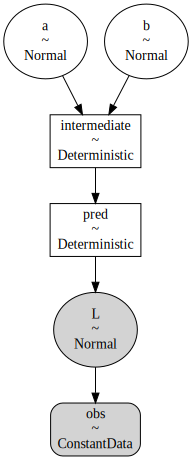

In [4]:
display(pm.model_to_graphviz(pmodel2, selected_vars=["L"]))

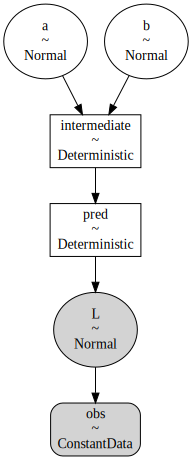

In [5]:
display(pm.model_to_graphviz(pmodel2, selected_vars=["obs"]))